# Avocado Consumption by Age and by Region

In this notebook we will use the Census and Avocado database to plot the avocado consumption in the US by age and by region

In [ ]:
%matplotlib notebook

In [2]:
# Import dependencies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Import csv files
#     For census
census_file_2015 = os.path.join('data','census_data_2015_clean.csv')
census_file_2016 = os.path.join('data','census_data_2016_clean.csv')
census_file_2017 = os.path.join('data','census_data_2017_clean.csv')

#     For avocado
avocado_file_2015 = os.path.join('Resources','avocado2015.csv')
avocado_file_2016 = os.path.join('Resources','avocado2016.csv')
avocado_file_2017 = os.path.join('Resources','avocado2017.csv')

# Read csv files
#     For census
census_2015_df = pd.read_csv(census_file_2015)
census_2016_df = pd.read_csv(census_file_2016)
census_2017_df = pd.read_csv(census_file_2017)
#     For avocado
avocado_2015_df = pd.read_csv(avocado_file_2015)
avocado_2016_df = pd.read_csv(avocado_file_2016)
avocado_2017_df = pd.read_csv(avocado_file_2017)

In [4]:
# Display csv files

# census_2015_df
# census_2016_df.head()
# census_2017_df.head()
# avocado_2015_df.head()
# avocado_2016_df.head()
# avocado_2017_df.head()

## Adding region column to Census db based on zipcode range and getting the mean for each region

In [5]:
# census 2015
zipcode_range = [census_2015_df['Zipcode'].between(1020, 1199), census_2015_df['Zipcode'].between(2101, 2445), census_2015_df['Zipcode'].between(6101, 6167), census_2015_df['Zipcode'].between(10001, 11104), census_2015_df['Zipcode'].between(12084,12260), census_2015_df['Zipcode'].between(13201, 13290), census_2015_df['Zipcode'].between(14201, 14276), census_2015_df['Zipcode'].between(14602, 14694), census_2015_df['Zipcode'].between(15106, 15295), census_2015_df['Zipcode'].between(17025, 17130), census_2015_df['Zipcode'].between(18503, 18519), census_2015_df['Zipcode'].between(19019, 19255), census_2015_df['Zipcode'].between(20001, 20456), census_2015_df['Zipcode'].between(21201, 21298), census_2015_df['Zipcode'].between(91911, 92199), census_2015_df['Zipcode'].between(23173, 23298), census_2015_df['Zipcode'].between(23324, 23551), census_2015_df['Zipcode'].between(24001, 24050), census_2015_df['Zipcode'].between(27214, 27499), census_2015_df['Zipcode'].between(27513, 27698), census_2015_df['Zipcode'].between(28105, 28299), census_2015_df['Zipcode'].between(29401, 29493), census_2015_df['Zipcode'].between(30301, 31196), census_2015_df['Zipcode'].between(32034, 32257), census_2015_df['Zipcode'].between(32789, 32897), census_2015_df['Zipcode'].between(33101, 33255), census_2015_df['Zipcode'].between(33301, 33394), census_2015_df['Zipcode'].between(33601, 33681), census_2015_df['Zipcode'].between(37011, 37250), census_2015_df['Zipcode'].between(40018, 40299), census_2015_df['Zipcode'].between(41073, 45299), census_2015_df['Zipcode'].between(43004, 43291), census_2015_df['Zipcode'].between(45377, 45490), census_2015_df['Zipcode'].between(46077, 46298), census_2015_df['Zipcode'].between(48127, 48288), census_2015_df['Zipcode'].between(49501, 49599), census_2015_df['Zipcode'].between(60007, 60827), census_2015_df['Zipcode'].between(60044, 60088), census_2015_df['Zipcode'].between(63101, 63199), census_2015_df['Zipcode'].between(70032, 70190), census_2015_df['Zipcode'].between(75001, 76217), census_2015_df['Zipcode'].between(76006, 76262), census_2015_df['Zipcode'].between(77001, 77571), census_2015_df['Zipcode'].between(80014, 80642), census_2015_df['Zipcode'].between(83701, 83735), census_2015_df['Zipcode'].between(85001, 85709), census_2015_df['Zipcode'].between(85641, 86714), census_2015_df['Zipcode'].between(87001, 88439), census_2015_df['Zipcode'].between(88901, 89163), census_2015_df['Zipcode'].between(90001, 91610), census_2015_df['Zipcode'].between(90210, 90296), census_2015_df['Zipcode'].between(94016, 94188), census_2015_df['Zipcode'].between(94203, 95894), census_2015_df['Zipcode'].between(97035, 97296), census_2015_df['Zipcode'].between(98101, 98191), census_2015_df['Zipcode'].between(99201, 99260)]
city = ["HartfordSpringfield", "Boston", "HartfordSpringfield", "NewYork", "Albany", "Syracuse", "BuffaloRochester", "BuffaloRochester", "Pittsburgh", "HarrisburgScranton", "HarrisburgScranton", "Philadelphia", "BaltimoreWashington", "BaltimoreWashington", "SanDiego", "RichmondNorfolk", "RichmondNorfolk", "Roanoke", "RaleighGreensboro", "RaleighGreensboro", "Charlotte", "SouthCarolina", "Atlanta", "Jacksonville", "Orlando", "MiamiFtLauderdale", "MiamiFtLauderdale", "Tampa", "Nashville", "Louisville", "CincinnatiDayton", "Columbus", "CincinnatiDayton", "Indianapolis", "Detroit", "GrandRapids", "Chicago", "GreatLakes", "StLouis", "NewOrleansMobile", "DallasFtWorth", "DallasFtWorth", "Houston", "Denver", "Boise", "PhoenixTucson", "PhoenixTucson", "WestTexNewMexico", "LasVegas", "LosAngeles", "California", "SanFrancisco", "Sacramento", "Portland", "Seattle", "Spokane"]
census_2015_df['region'] = np.select(zipcode_range, city, 0)

census_2015_avg = census_2015_df.groupby(['region']).mean()

census_2015_avg


,Zipcode,Population,Median Age,Household Income,Per Capita Income
region,,,,,
0,47670.711446,8267.126617,42.404390,52540.372171,26459.072159
Albany,12153.790698,5355.093023,43.820930,62055.465116,31027.627907
Atlanta,30690.723473,11295.530547,39.880064,43169.826367,22475.807074
BaltimoreWashington,20493.740385,26444.240385,38.003846,86770.461538,43212.625000
Boise,83708.400000,26614.300000,37.280000,54509.700000,31414.700000
Boston,2215.876543,23028.012346,37.492593,74986.234568,42649.234568
BuffaloRochester,14394.530612,21046.326531,36.997959,42365.326531,25555.632653
Charlotte,28172.435484,22789.274194,37.824194,51209.193548,27579.419355
Chicago,60359.771084,25848.412651,38.590361,71230.358434,35063.855422


In [6]:
# census 2016
zipcode_range = [census_2016_df['Zipcode'].between(1020, 1199), census_2016_df['Zipcode'].between(2101, 2445), census_2016_df['Zipcode'].between(6101, 6167), census_2016_df['Zipcode'].between(10001, 11104), census_2016_df['Zipcode'].between(12084,12260), census_2016_df['Zipcode'].between(13201, 13290), census_2016_df['Zipcode'].between(14201, 14276), census_2016_df['Zipcode'].between(14602, 14694), census_2016_df['Zipcode'].between(15106, 15295), census_2016_df['Zipcode'].between(17025, 17130), census_2016_df['Zipcode'].between(18503, 18519), census_2016_df['Zipcode'].between(19019, 19255), census_2016_df['Zipcode'].between(20001, 20456), census_2016_df['Zipcode'].between(21201, 21298), census_2016_df['Zipcode'].between(91911, 92199), census_2016_df['Zipcode'].between(23173, 23298), census_2016_df['Zipcode'].between(23324, 23551), census_2016_df['Zipcode'].between(24001, 24050), census_2016_df['Zipcode'].between(27214, 27499), census_2016_df['Zipcode'].between(27513, 27698), census_2016_df['Zipcode'].between(28105, 28299), census_2016_df['Zipcode'].between(29401, 29493), census_2016_df['Zipcode'].between(30301, 31196), census_2016_df['Zipcode'].between(32034, 32257), census_2016_df['Zipcode'].between(32789, 32897), census_2016_df['Zipcode'].between(33101, 33255), census_2016_df['Zipcode'].between(33301, 33394), census_2016_df['Zipcode'].between(33601, 33681), census_2016_df['Zipcode'].between(37011, 37250), census_2016_df['Zipcode'].between(40018, 40299), census_2016_df['Zipcode'].between(41073, 45299), census_2016_df['Zipcode'].between(43004, 43291), census_2016_df['Zipcode'].between(45377, 45490), census_2016_df['Zipcode'].between(46077, 46298), census_2016_df['Zipcode'].between(48127, 48288), census_2016_df['Zipcode'].between(49501, 49599), census_2016_df['Zipcode'].between(60007, 60827), census_2016_df['Zipcode'].between(60044, 60088), census_2016_df['Zipcode'].between(63101, 63199), census_2016_df['Zipcode'].between(70032, 70190), census_2016_df['Zipcode'].between(75001, 76217), census_2016_df['Zipcode'].between(76006, 76262), census_2016_df['Zipcode'].between(77001, 77571), census_2016_df['Zipcode'].between(80014, 80642), census_2016_df['Zipcode'].between(83701, 83735), census_2016_df['Zipcode'].between(85001, 85709), census_2016_df['Zipcode'].between(85641, 86714), census_2016_df['Zipcode'].between(87001, 88439), census_2016_df['Zipcode'].between(88901, 89163), census_2016_df['Zipcode'].between(90001, 91610), census_2016_df['Zipcode'].between(90210, 90296), census_2016_df['Zipcode'].between(94016, 94188), census_2016_df['Zipcode'].between(94203, 95894), census_2016_df['Zipcode'].between(97035, 97296), census_2016_df['Zipcode'].between(98101, 98191), census_2016_df['Zipcode'].between(99201, 99260)]
city = ["HartfordSpringfield", "Boston", "HartfordSpringfield", "NewYork", "Albany", "Syracuse", "BuffaloRochester", "BuffaloRochester", "Pittsburgh", "HarrisburgScranton", "HarrisburgScranton", "Philadelphia", "BaltimoreWashington", "BaltimoreWashington", "SanDiego", "RichmondNorfolk", "RichmondNorfolk", "Roanoke", "RaleighGreensboro", "RaleighGreensboro", "Charlotte", "SouthCarolina", "Atlanta", "Jacksonville", "Orlando", "MiamiFtLauderdale", "MiamiFtLauderdale", "Tampa", "Nashville", "Louisville", "CincinnatiDayton", "Columbus", "CincinnatiDayton", "Indianapolis", "Detroit", "GrandRapids", "Chicago", "GreatLakes", "StLouis", "NewOrleansMobile", "DallasFtWorth", "DallasFtWorth", "Houston", "Denver", "Boise", "PhoenixTucson", "PhoenixTucson", "WestTexNewMexico", "LasVegas", "LosAngeles", "California", "SanFrancisco", "Sacramento", "Portland", "Seattle", "Spokane"]
census_2016_df['region'] = np.select(zipcode_range, city, 0)

census_2016_avg = census_2016_df.groupby(['region']).mean()

census_2016_avg

,Zipcode,Population,Median Age,Household Income,Per Capita Income
region,,,,,
0,47651.374426,8292.417008,42.622262,53737.637705,27165.142336
Albany,12153.905882,5400.494118,43.880000,61397.211765,31850.588235
Atlanta,30686.929260,11380.430868,40.132476,44331.816720,23222.794212
BaltimoreWashington,20493.740385,26714.144231,38.093269,88517.875000,44071.394231
Boise,83708.400000,27025.300000,37.170000,56357.800000,32924.900000
Boston,2215.876543,23225.185185,37.593827,77753.530864,43865.283951
BuffaloRochester,14394.530612,21043.306122,36.985714,43554.142857,26256.714286
Charlotte,28172.435484,23208.419355,37.993548,52927.951613,28440.080645
Chicago,60360.522659,25908.135952,38.655589,73140.102719,36114.719033


In [7]:
# census 2017
zipcode_range = [census_2017_df['Zipcode'].between(1020, 1199), census_2017_df['Zipcode'].between(2101, 2445), census_2017_df['Zipcode'].between(6101, 6167), census_2017_df['Zipcode'].between(10001, 11104), census_2017_df['Zipcode'].between(12084,12260), census_2017_df['Zipcode'].between(13201, 13290), census_2017_df['Zipcode'].between(14201, 14276), census_2017_df['Zipcode'].between(14602, 14694), census_2017_df['Zipcode'].between(15106, 15295), census_2017_df['Zipcode'].between(17025, 17130), census_2017_df['Zipcode'].between(18503, 18519), census_2017_df['Zipcode'].between(19019, 19255), census_2017_df['Zipcode'].between(20001, 20456), census_2017_df['Zipcode'].between(21201, 21298), census_2017_df['Zipcode'].between(91911, 92199), census_2017_df['Zipcode'].between(23173, 23298), census_2017_df['Zipcode'].between(23324, 23551), census_2017_df['Zipcode'].between(24001, 24050), census_2017_df['Zipcode'].between(27214, 27499), census_2017_df['Zipcode'].between(27513, 27698), census_2017_df['Zipcode'].between(28105, 28299), census_2017_df['Zipcode'].between(29401, 29493), census_2017_df['Zipcode'].between(30301, 31196), census_2017_df['Zipcode'].between(32034, 32257), census_2017_df['Zipcode'].between(32789, 32897), census_2017_df['Zipcode'].between(33101, 33255), census_2017_df['Zipcode'].between(33301, 33394), census_2017_df['Zipcode'].between(33601, 33681), census_2017_df['Zipcode'].between(37011, 37250), census_2017_df['Zipcode'].between(40018, 40299), census_2017_df['Zipcode'].between(41073, 45299), census_2017_df['Zipcode'].between(43004, 43291), census_2017_df['Zipcode'].between(45377, 45490), census_2017_df['Zipcode'].between(46077, 46298), census_2017_df['Zipcode'].between(48127, 48288), census_2017_df['Zipcode'].between(49501, 49599), census_2017_df['Zipcode'].between(60007, 60827), census_2017_df['Zipcode'].between(60044, 60088), census_2017_df['Zipcode'].between(63101, 63199), census_2017_df['Zipcode'].between(70032, 70190), census_2017_df['Zipcode'].between(75001, 76217), census_2017_df['Zipcode'].between(76006, 76262), census_2017_df['Zipcode'].between(77001, 77571), census_2017_df['Zipcode'].between(80014, 80642), census_2017_df['Zipcode'].between(83701, 83735), census_2017_df['Zipcode'].between(85001, 85709), census_2017_df['Zipcode'].between(85641, 86714), census_2017_df['Zipcode'].between(87001, 88439), census_2017_df['Zipcode'].between(88901, 89163), census_2017_df['Zipcode'].between(90001, 91610), census_2017_df['Zipcode'].between(90210, 90296), census_2017_df['Zipcode'].between(94016, 94188), census_2017_df['Zipcode'].between(94203, 95894), census_2017_df['Zipcode'].between(97035, 97296), census_2017_df['Zipcode'].between(98101, 98191), census_2017_df['Zipcode'].between(99201, 99260)]
city = ["HartfordSpringfield", "Boston", "HartfordSpringfield", "NewYork", "Albany", "Syracuse", "BuffaloRochester", "BuffaloRochester", "Pittsburgh", "HarrisburgScranton", "HarrisburgScranton", "Philadelphia", "BaltimoreWashington", "BaltimoreWashington", "SanDiego", "RichmondNorfolk", "RichmondNorfolk", "Roanoke", "RaleighGreensboro", "RaleighGreensboro", "Charlotte", "SouthCarolina", "Atlanta", "Jacksonville", "Orlando", "MiamiFtLauderdale", "MiamiFtLauderdale", "Tampa", "Nashville", "Louisville", "CincinnatiDayton", "Columbus", "CincinnatiDayton", "Indianapolis", "Detroit", "GrandRapids", "Chicago", "GreatLakes", "StLouis", "NewOrleansMobile", "DallasFtWorth", "DallasFtWorth", "Houston", "Denver", "Boise", "PhoenixTucson", "PhoenixTucson", "WestTexNewMexico", "LasVegas", "LosAngeles", "California", "SanFrancisco", "Sacramento", "Portland", "Seattle", "Spokane"]
census_2017_df['region'] = np.select(zipcode_range, city, 0)

census_2017_avg = census_2017_df.groupby(['region']).mean()

census_2017_avg

,Zipcode,Population,Median Age,Household Income,Per Capita Income
region,,,,,
0,47648.500000,8390.360495,42.843155,55714.943340,28266.308371
Albany,12154.270588,5411.223529,44.329412,63730.294118,32390.564706
Atlanta,30691.490323,11536.551613,40.430645,46047.938710,24411.687097
BaltimoreWashington,20496.747573,27302.650485,37.974757,91226.766990,45355.087379
Boise,83708.400000,27267.700000,37.290000,59122.000000,34615.600000
Boston,2215.876543,23480.222222,37.612346,82301.345679,46476.098765
BuffaloRochester,14394.530612,21040.510204,37.051020,44498.612245,27365.775510
Charlotte,28172.435484,23612.322581,38.387097,55699.322581,30185.516129
Chicago,60360.522659,25971.516616,39.022961,75901.900302,37958.075529


## Getting average of total volume by region in avocado db

In [8]:
# avocado_2015_df.head()
# avocado_2016_df.head()
# avocado_2017_df.head()

In [9]:
avocado_2015_avg = avocado_2015_df.groupby(['region']).mean()
avocado_2015_avg

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
Albany,25.5,1.538750,3.874900e+04,534.970096,30959.871154,334.397500,6919.765385,6744.927404,173.515865,1.322115,2015.0
Atlanta,25.5,1.380577,2.233817e+05,174806.231538,19379.332212,378.929038,28817.219904,18091.291923,10717.445673,8.482308,2015.0
BaltimoreWashington,25.5,1.368846,3.908229e+05,30714.311346,245936.289423,22938.484615,91233.794808,88677.811635,2522.575000,33.408173,2015.0
Boise,25.5,1.373750,3.638805e+04,22976.123942,5776.157692,2654.668654,4981.101058,4641.513846,323.131346,16.455865,2015.0
Boston,25.5,1.473558,2.639903e+05,2362.243269,205448.806346,806.996827,55372.257788,54624.526154,746.329423,1.402212,2015.0
BuffaloRochester,25.5,1.544615,5.666572e+04,780.179712,25168.726250,338.568558,30378.242788,30119.869808,257.090865,1.282115,2015.0
Charlotte,25.5,1.575769,9.122446e+04,17174.833077,25895.539423,21123.334808,27030.748654,24915.256827,2114.543654,0.948173,2015.0
Chicago,25.5,1.404038,3.989877e+05,17732.417692,282126.702212,54713.689231,44414.849808,42511.074615,1493.755288,410.019904,2015.0
CincinnatiDayton,25.5,1.202308,1.130402e+05,2386.418942,76819.548269,4588.439712,29245.746923,10419.153558,17843.387981,983.205385,2015.0


In [10]:
avocado_2016_avg = avocado_2016_df.groupby(['region']).mean()
avocado_2016_avg

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
Albany,25.5,1.533942,5.061861e+04,2717.872308,39807.862788,32.300288,8060.576058,7629.006154,222.983942,208.585962,2016.0
Atlanta,25.5,1.214135,2.723738e+05,130721.741538,45507.942788,213.986058,95930.159423,52369.293077,43229.854712,331.011635,2016.0
BaltimoreWashington,25.5,1.587596,3.932096e+05,34725.001731,245644.540192,13265.294519,99574.801250,96155.722885,2591.820673,827.257692,2016.0
Boise,25.5,1.141923,4.474528e+04,17541.960673,2734.460577,2388.346346,22080.516346,20934.522404,1099.331250,46.662692,2016.0
Boston,25.5,1.426154,2.939550e+05,5719.369519,208503.586250,13075.300673,66656.696154,65671.839423,635.623365,349.233365,2016.0
BuffaloRochester,25.5,1.483846,6.927992e+04,827.800192,33671.252692,93.266923,34687.603365,33335.890385,1013.139327,338.573654,2016.0
Charlotte,25.5,1.497885,1.017954e+05,20891.513654,39202.107115,11893.617212,29808.156250,25954.089519,3647.095673,206.971058,2016.0
Chicago,25.5,1.547308,3.808907e+05,26622.309423,243914.493269,60119.509904,50234.418365,46473.519615,2337.772404,1423.126346,2016.0
CincinnatiDayton,25.5,1.088365,1.348160e+05,2165.781058,68767.531538,4127.571827,59755.138462,11330.287596,47300.493654,1124.357212,2016.0


In [11]:
avocado_2017_avg = avocado_2017_df.groupby(['region']).mean()
avocado_2017_avg

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
Albany,26.0,1.637830,4.935455e+04,1608.511132,39712.432453,151.473208,7882.128302,4943.011226,2763.058868,176.067642,2017.0
Atlanta,26.0,1.428774,2.718408e+05,130942.533396,30604.899057,225.716698,110067.614811,70132.168962,38002.920189,1932.516226,2017.0
BaltimoreWashington,26.0,1.679434,3.869399e+05,36991.946981,236595.033868,3691.338019,109661.628868,104926.584717,3672.241132,1062.793585,2017.0
Boise,26.0,1.492642,4.491096e+04,18944.412547,2142.946415,4064.179151,19759.427075,16523.018491,3212.219057,24.170660,2017.0
Boston,26.0,1.679528,2.887799e+05,5850.340377,214698.783585,1905.749245,66325.052830,56744.661698,9218.595472,361.776792,2017.0
BuffaloRochester,26.0,1.587736,7.302175e+04,2624.970189,34292.809245,28.714717,36075.239340,30964.244434,4724.377075,386.627264,2017.0
Charlotte,26.0,1.769811,1.122226e+05,26195.474528,42507.698491,3879.313113,39640.064811,36231.142170,2956.312642,452.610000,2017.0
Chicago,26.0,1.714811,3.866109e+05,45569.380189,232659.731509,59411.768962,48969.745566,40620.649906,6648.931887,1700.163774,2017.0
CincinnatiDayton,26.0,1.319434,1.428932e+05,3914.086226,47567.881226,995.896415,90408.527736,15926.054717,74359.187170,123.295283,2017.0


## MERGE, MERGE, MERGE!!!

Merge by year census and avocado db

In [24]:
average_2015_df = census_2015_avg.merge(avocado_2015_avg, on='region', how='inner')
average_2015_df

# drop unnecessary columns for plots

final_average_2015_df = average_2015_df.drop(columns=['Zipcode', 'Household Income', 'Unnamed: 0', '4046', '4770', '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
final_2015_df = final_average_2015_df.reset_index()

In [25]:
average_2016_df = census_2016_avg.merge(avocado_2016_avg, on='region', how='inner')
average_2016_df

# drop unnecessary columns for plots

final_average_2016_df = average_2016_df.drop(columns=['Zipcode', 'Household Income', 'Unnamed: 0', '4046', '4770', '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
final_2016_df = final_average_2016_df.reset_index()

In [30]:
average_2017_df = census_2017_avg.merge(avocado_2017_avg, on='region', how='inner')
average_2017_df

# drop unnecessary columns for plots

final_average_2017_df = average_2017_df.drop(columns=['Zipcode', 'Household Income', 'Unnamed: 0', '4046', '4770', '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
final_2017_df = final_average_2017_df.reset_index()
final_2017_df.head()

,region,Population,Median Age,Per Capita Income,AveragePrice,Total Volume,year
0,Albany,5411.223529,44.329412,32390.564706,1.637830,49354.545094,2017.0
1,Atlanta,11536.551613,40.430645,24411.687097,1.428774,271840.754528,2017.0
2,BaltimoreWashington,27302.650485,37.974757,45355.087379,1.679434,386939.947736,2017.0
3,Boise,27267.700000,37.290000,34615.600000,1.492642,44910.955755,2017.0
4,Boston,23480.222222,37.612346,46476.098765,1.679528,288779.926038,2017.0


Setting up variables for plots

In [78]:
region_15 = final_2015_df['region']
age_15 = final_2015_df['Median Age']
total_15 = final_2015_df['Total Volume']
income_15 = final_2015_df['Per Capita Income']

region_16 = final_2016_df['region']
age_16 = final_2016_df['Median Age']
total_16 = final_2016_df['Total Volume']
income_16 = final_2016_df['Per Capita Income']


region_17 = final_2017_df['region']
age_17 = final_2017_df['Median Age']
total_17 = final_2017_df['Total Volume']
income_17 = final_2017_df['Per Capita Income']

# PLOTS!
### (Finally)

TypeError: zip argument #2 must support iteration

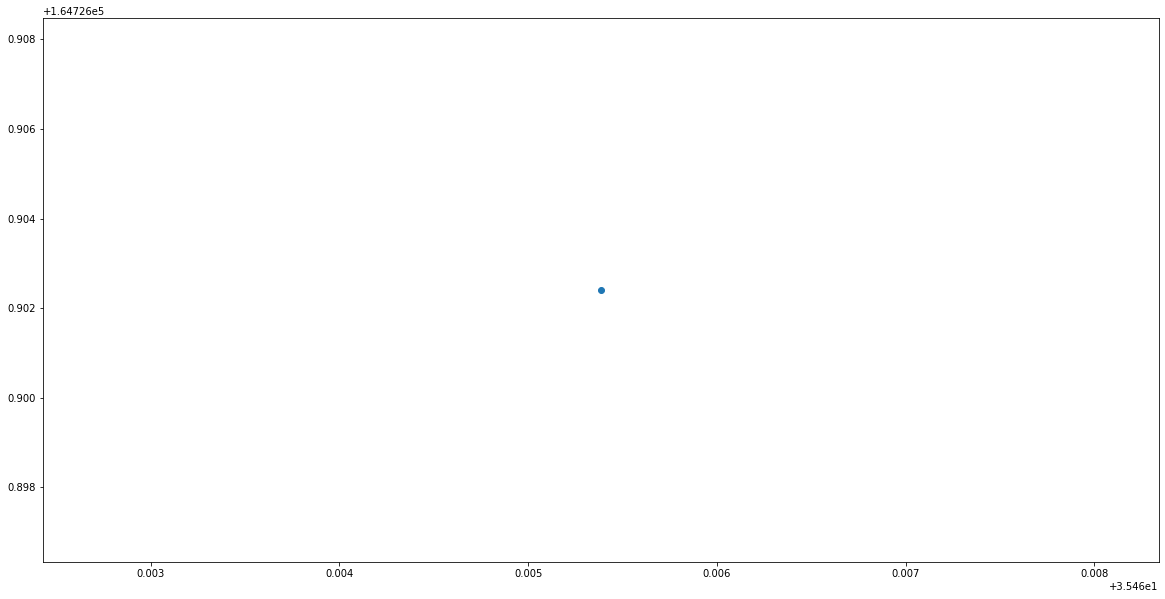

In [77]:
# final_average_2015_df.plot(kind='scatter', x='Median Age', y='Total Volume')

plt.figure(figsize=(20,10))
plt.scatter(age_15, total_15, marker = 'o', cmap=plt.get_cmap('Spectral'))

for region_15, age_15, total_15 in zip(region_15, age_15, total_15):
    plt.annotate(
        region_15,
        xy=(age_15, total_15), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

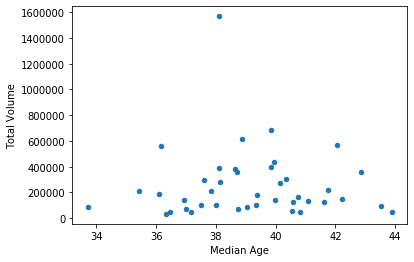

In [45]:
final_average_2016_df.plot(kind='scatter', x='Median Age', y='Total Volume')

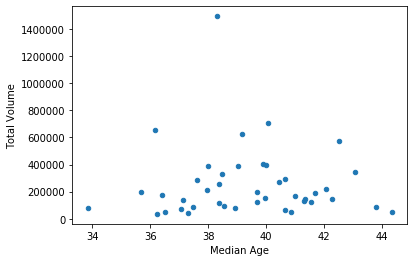

In [57]:
final_average_2017_df.plot(kind='scatter', x='Median Age', y='Total Volume')

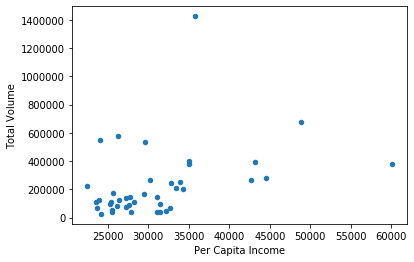

In [58]:
final_average_2015_df.plot(kind='scatter', x='Per Capita Income', y='Total Volume')

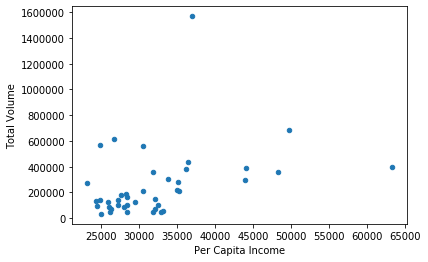

In [59]:
final_average_2016_df.plot(kind='scatter', x='Per Capita Income', y='Total Volume')

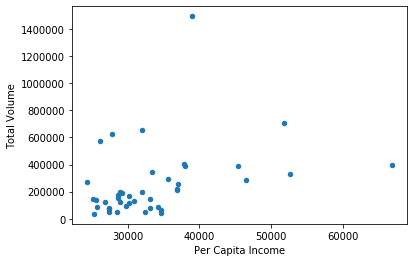

In [60]:
final_average_2017_df.plot(kind='scatter', x='Per Capita Income', y='Total Volume')

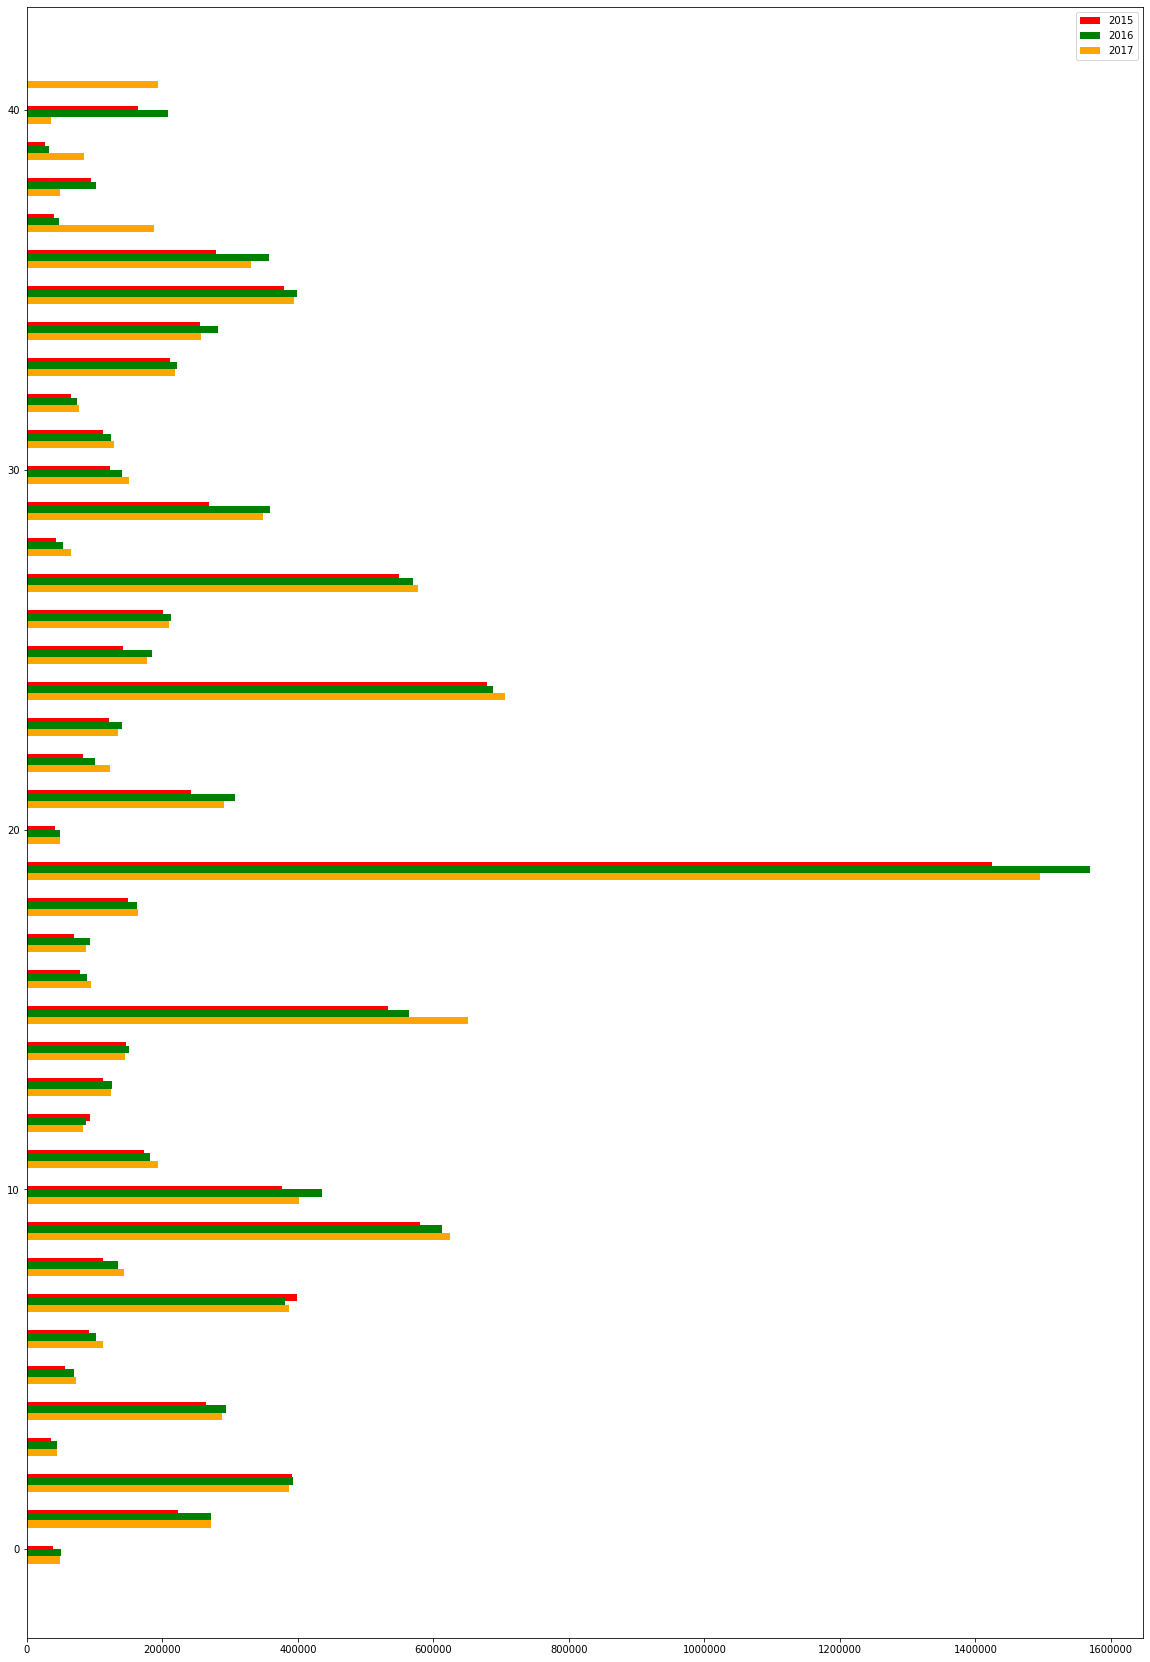

In [111]:
y = np.arange(len(region_17))
x = np.arange(len(region_15))
fig, ax = plt.subplots(figsize=(20,30))
width = 0.2

ax.barh(x, total_15, width, color='red', label='2015')
ax.barh(x - width/2, total_16, width, color='green', label='2016')
ax.barh(y - width*1.5, total_17, width, color='orange', label='2017')



# ax.set(yticks=region_15 + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

In [104]:
region_15

0                  Albany
1                 Atlanta
2     BaltimoreWashington
3                   Boise
4                  Boston
5        BuffaloRochester
6               Charlotte
7                 Chicago
8        CincinnatiDayton
9           DallasFtWorth
10                 Denver
11                Detroit
12            GrandRapids
13     HarrisburgScranton
14    HartfordSpringfield
15                Houston
16           Indianapolis
17           Jacksonville
18               LasVegas
19             LosAngeles
20             Louisville
21      MiamiFtLauderdale
22              Nashville
23       NewOrleansMobile
24                NewYork
25                Orlando
26           Philadelphia
27          PhoenixTucson
28             Pittsburgh
29               Portland
30      RaleighGreensboro
31        RichmondNorfolk
32                Roanoke
33             Sacramento
34               SanDiego
35           SanFrancisco
36                Seattle
37                Spokane
38          